# Digital signal processing - 5

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Signals

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft, fftshift

%matplotlib inline

## Deterministic signals

There are many signals of various shapes in the world, however, in tasks of digital and analog processing, well-known signals are often used - harmonic form, modulated (in amplitude, frequency or phase). As you know, a signal of any shape can be represented as a collection of harmonic signals of different frequencies and amplitudes (that is, a set of spectral samples). We can say that the more complex the signal, the more spectral readings are required to represent it. In particular, high spectrum frequencies are required to represent signals with abrupt changes in shape, while "smooth" signals and slowly changing processes do not require high frequencies and do not contribute to the resulting signal (and its spectrum).

### Harmonic signal

The harmonic signal is given by the equation:

$ s (t) = A \cdot cos (2 \pi ft + \phi) $,

where * A * is the vibration amplitude, f is the signal frequency, φ is the initial phase.

Complex recording of such a signal:

$ s = A \cdot e ^ {j (2 \pi ft + \phi)} $,

where * j * is a complex unit. Often expressed as $ j = \sqrt-1 $

Below is a graph of the harmonic signal at various parameters of the frequency value. Amplitude = 1, initial phase = 0 (constants).

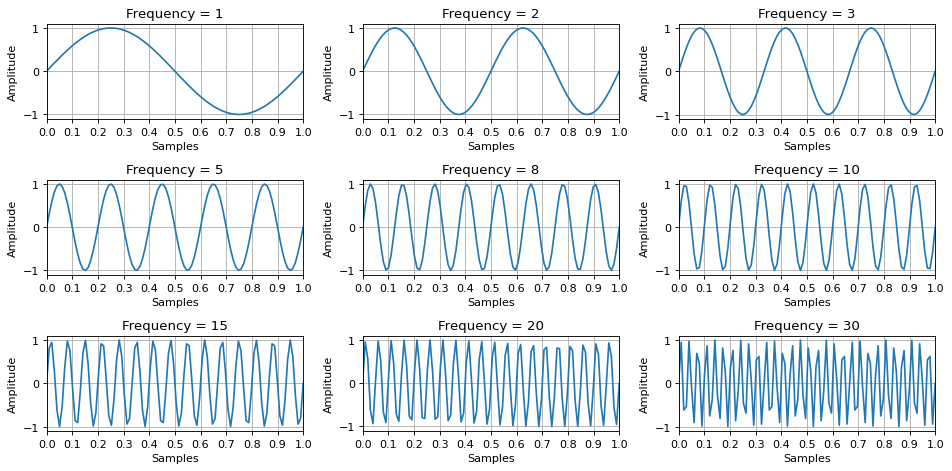

In [2]:
n = 100
t = np.linspace(0, 1, n, endpoint=True)

# list of frequencies
f_list = np.array([1, 2, 3, 5, 8, 10, 15, 20, 30])

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(f_list):
    plt.subplot(3, 3, i+1)
    plt.plot(t, np.sin(2*np.pi*freq*t))
    plt.title(f'Frequency = {freq}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))
    plt.grid()
plt.tight_layout()

## Modulation

Despite the fact that modulation is inherent in analog oscillations, it is necessary to understand in what ways information messages can be transmitted. For digital signals, discrete waveform modulation is called ** keying ** and will also be discussed in this section.

** Modulation ** is the process of changing one or more signal parameters. The modulated signal is called the "carrier" (the modulated message is transmitted at the frequency of this signal). The information signal is called modulating. Typically, the baseband signal is low frequency and the carrier signal is high frequency. In the process of modulating the carrier signal, the spectrum of the modulating signal is transferred to the carrier frequency region. Harmonic signals can be time modulated in amplitude, frequency and phase.

The transmission of the electromagnetic field in space is performed using antennas, the size of which depends on the wavelength $ \lambda $; in many cases, it is simply physically impossible to transmit low-frequency information signals from the source to the receiver (antennas of huge sizes are required). In this regard, methods of modulation of high-frequency carrier waves are used.

### Amplitude Modulation

Amplitude modulation is a well-known way to change the waveform in terms of the amplitude parameter. From the name it is obvious that the amplitude of such a signal changes over time. The amplitude variation law is arbitrary; in practice, harmonic oscillation modulation is often used.

The formula for the simplest harmonic AM signal:

$ s (t) = A_c \cdot (1 + m \cdot cos (\omega_mt + \phi)) \cdot cos (\omega_ct) $,

Where
- $ A_ {c} $ - carrier oscillation amplitude,
- $ \omega_ {c} $ - carrier signal frequency,
- $ \omega_ {m} $ is the frequency of the modulating (information) signal,
- $ \phi $ - the initial phase of the modulating signal,
- **m** - modulation factor.

Then, the radio signal consists of a carrier wave and two sidebands. From the name, it is obvious that the carrier frequency is the one at which the signal propagates. Typically this is a high frequency relative to the modulating frequency.

The modulating frequency, in turn, is low frequency. This is the frequency at which the informational message is transmitted.

For the sinusoidal signal used as an example, the sidebands are sinusoidal signals and their frequencies are $ \omega_ {c} + \omega_ {m} $ and $ \omega_ {c} - \omega_ {m} $. The AM signal spectrum is always symmetrical about the center (carrier) frequency.

It is important to understand that the center frequency does not carry useful information, although it is called the "carrier". This concept embeds the value of the frequency relative to which the information (modulating) frequencies of the signal are located.

Let's create an AM signal function:

In [3]:
def signal_am(amp=1.0, km=0.25, fc=10.0, fs=2.0, period=100):
    """
    Create Amplitude modulation (AM) signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    km : float
        Modulation coeff: amplitude sensitivity 0 <= km < 1
    fc : float
        Carrier frequency
    fs : float
        Signal frequency
    period : integer
        Number of points for signal (same as period)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * tt)) * np.cos(fc * tt)

The graphs below show how the shape and spectrum of the AM signal changes when the parameter ** carrier frequency ** $ f_c $ changes:

As you can see, the spectrum of the AM signal consists of three components: the central one - the carrier, and two side - modulating ones. When the carrier frequency changes, the entire AM signal is shifted in frequency.

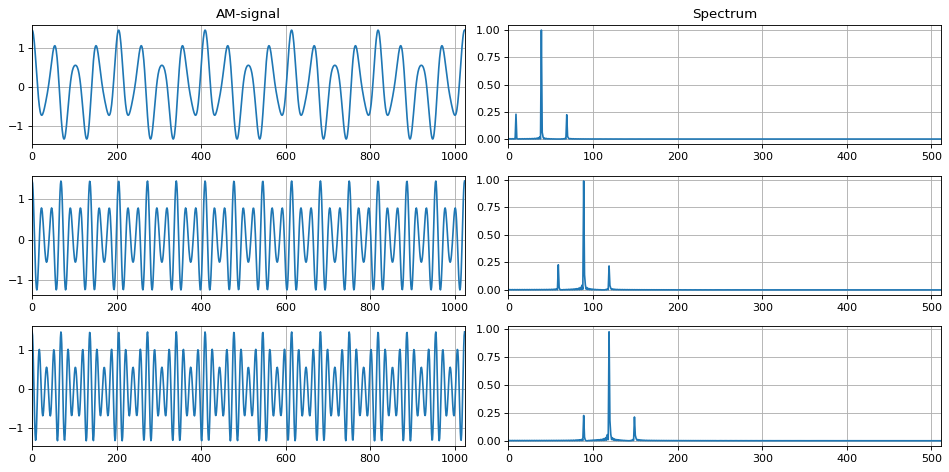

In [4]:
N = 1024

# Create AM-signal
fs = 15             # Modulation frequency
fc = [20, 45, 60]   # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=i, fs=fs, period=N) for i in fc]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fc):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fc), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

The graphs below show how the shape and spectrum of the AM signal changes when the parameter ** modulating oscillation frequency ** $ f_s $ changes:

As you can see, with a change in the modulating frequency, the spectrum does not shift, but the distance between the center (carrier) frequency and the side (modulating) frequencies changes.

The spectrum width of the AM signal is twice the frequency of the modulating signal.

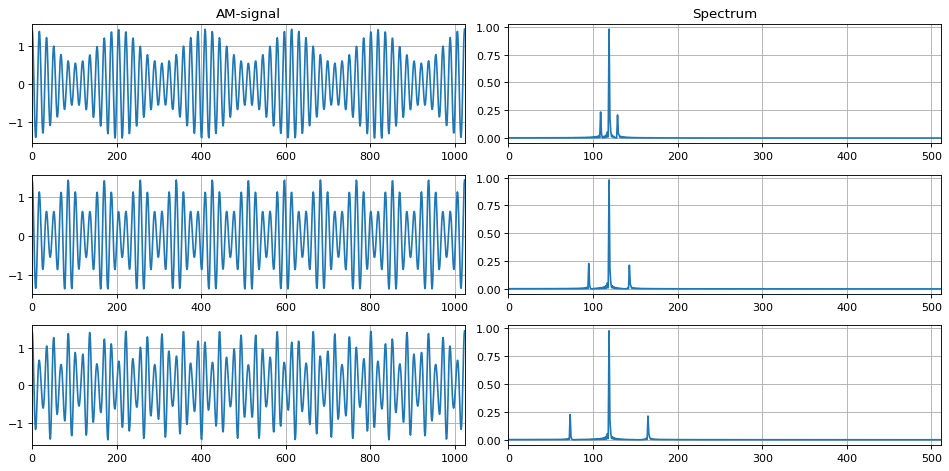

In [5]:
N = 1024
# Create AM-signal
fs = [5, 12, 23]    # Modulation frequency
fс = 60             # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=fс, fs=i, period=N) for i in fs]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fs):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fs), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Finally, let's see how the shape and spectrum of the AM signal changes when the parameter ** modulation coefficient ** $ k_m $ changes:

As you can see, when you change the modulation index, the signal spectrum remains in place. Only the level of the lateral components changes. Note that for $ k_m> 1 $ so-called overmodulation (overmodulation) occurs. The maximum value of the modulation factor at which there is no overmodulation of the AM signal $ k_m = 1 $.

The amplitude of the central harmonic is equal to the amplitude of the carrier oscillation: $ A_c = A_o $.

The amplitude of the lateral components is $ A_m = \frac {A_o \cdot m} {2} $

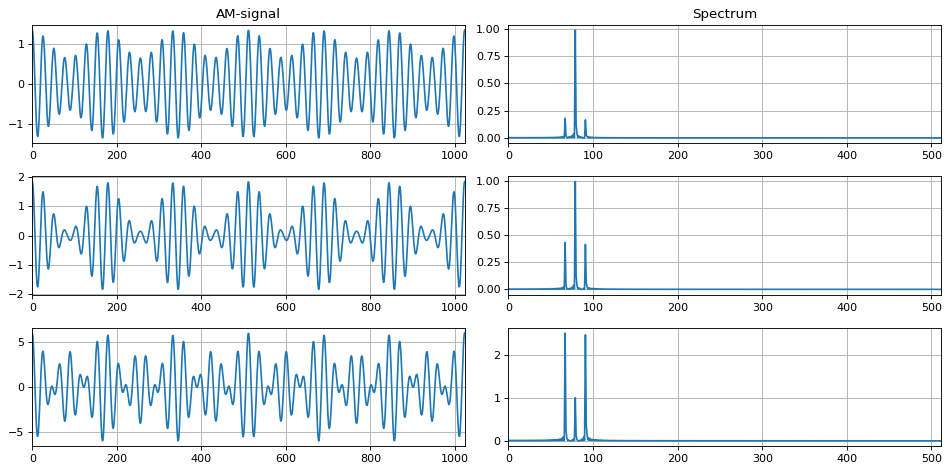

In [6]:
N = 1024
# Create AM-signal
fs = 6                  # Modulation frequency
fс = 40                 # Carrier frequency
km = [0.35, 0.85, 5]    # modulation coeff.

sig = [signal_am(amp=1.0, km=i, fc=fс, fs=fs, period=N) for i in km]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(km):
    plt.subplot(len(km), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(km), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Among the class of AM signals, there are a number of signals that make better use of the energy characteristics of the signal. For example, ** with suppressed carrier ** (balanced modulation) signals are classified as AM signals, and allow the transmission of messages more economically in terms of energy spectral characteristics. There is also single-sideband modulation (SSB), which has found application in professional and amateur radio communications. In turn, the single sideband modulation is split into a ** upper sideband (USB) and ** lower sideband (LSB) modulation.
____

### Angle Modulation

The term angular modulation refers to modulation in phase or in frequency (mathematically, you can imagine that the "angle" of the trigonometric function changes). Thus, angle modulated signals are divided into ** frequency modulated ** (FM) signals and ** phase modulated ** (PM) signals.

With phase modulation, the value of the phase angle changes in proportion to the information message, with frequency modulation, the information signal controls the frequency of the carrier wave. In both cases, the signal amplitude remains unchanged.

Angle modulation signals are used in music synthesizers, in television broadcasting for sound and chroma signal transmission, as well as for high-quality transmission of sound messages (for example, broadcasting in the VHF range). High quality in comparison with AM signals is achieved due to better use of the frequency range of the transmitted message. In other words, there is more information in the signal bandwidth than in AM-modulated signals. In addition, the information message of angle modulated signals is less susceptible to severe environmental influences during transmission, since the information is not contained in amplitude. Obviously, during propagation, the signal undergoes amplitude changes more often than phase or frequency changes.

Angle Modulated Signal Formula:

$ s(t) = A \cdot cos (2 \pi f_c t + k u_ {m} (t)) $

In case of harmonic modulation:

$ s (t) = A_c \cdot cos(2 \pi f_c t + \frac {A_ {m} f _ {\Delta}} {f_ {m}} sin (2 \pi f_s t)) $,

Where
- $ A_ {c} $ - carrier oscillation amplitude,
- $ A_ {m} $ is the amplitude of the modulating oscillation,
- $ f_ {c} $ - carrier signal frequency,
- $ f_ {m} $ is the frequency of the modulating (information) signal,
- $ f _ {\Delta} $ - frequency deviation.

The ratio of the frequency deviation to the frequency of the modulating waveform is called the frequency modulation index. As with the AM wobble, the modulating frequency is low frequency relative to the carrier frequency.

Let's create a simplified python FM signal function:

- $ A_ {mp} $ - oscillation amplitude,
- $ f_ {c} $ - carrier signal frequency,
- $ f_ {m} $ - frequency of the modulating signal,
- $ k_ {d} $ - frequency deviation.

In [7]:
def signal_fm(amp=1.0, kd=0.25, fc=10.0, fs=2.0, period=100):
    """
    Create Frequency modulation (FM) signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    kd : float
        Frequency deviation, kd < period/4,
        e.g. fc = 0, fs = 1, kd = 16
    fc : float
        Carrier frequency
    fs : float
        Signal frequency
    period : integer
        Number of points for signal (same as period)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * np.cos(fc * tt + kd/fs * np.sin(fs * tt))

Let's construct signals with frequency modulation depending on the value of the frequency deviation:

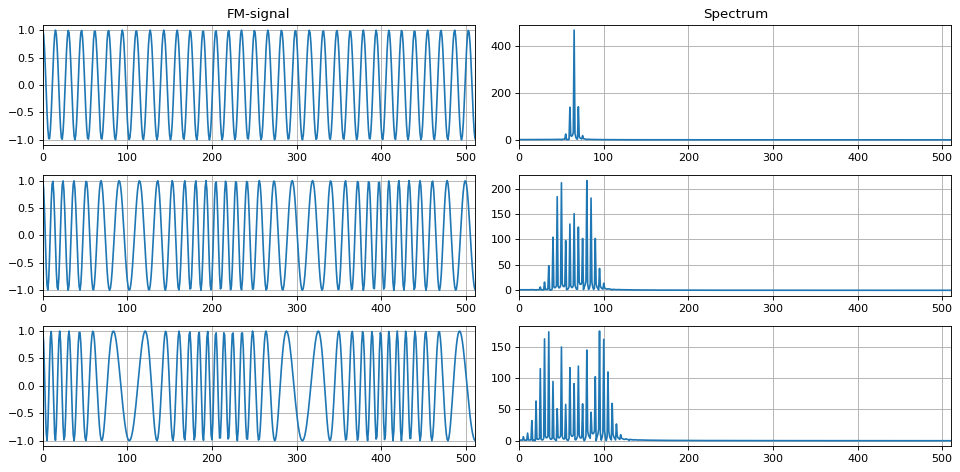

In [8]:
N = 1024
fs = 5            # Modulation frequency
fс = 65           # Carrier frequency
kd = [3, 23, 40]  # modulation coeff.

sig = [signal_fm(amp=1.0, kd=i, fc=fс, fs=fs, period=N) for i in kd]

# Calculate FFT
sft = np.abs(fft(sig, axis=1))

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(kd):
    plt.subplot(len(kd), 2, 2*i+1)
    if i == 0:
        plt.title('FM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

** Modulating and frequency modulated signals **

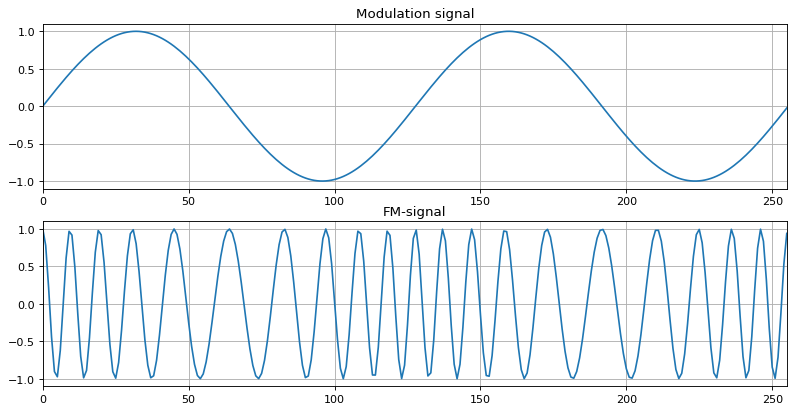

In [9]:
N = 512
sig = signal_fm(amp=1.0, kd=15, fc=40, fs=4, period=N)
smd = np.sin(4 * 2.0 * np.pi * np.linspace(0, 1, N))
                
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Modulation signal')
plt.plot(smd)
plt.xlim([0, N//2-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('FM-signal')
plt.plot(sig)
plt.xlim([0, N//2-1])
plt.grid(True)

As you can see, the greater the frequency deviation, the wider the spectrum of the angularly modulated signal.
____

### Linear frequency modulation

Chirp signals are a class of frequency modulated signals in which the frequency of the carrier signal changes linearly.

In radar tasks, it is often required to obtain a given range resolution, defined as the minimum distance between two targets, at which the range to each of the targets is determined separately. This value is inversely proportional to the width of the signal spectrum. Therefore, it is necessary to increase the spectrum width to decrease the resolution value.

Increasing the signal spectrum width can be achieved by decreasing the signal duration. But this, in turn, leads to a decrease in signal energy and detection range. A compromise solution is the use of complex signals, in particular - chirp signals.

The frequency change function is linear:

$ f (t) = f_ {0} + k t $

Where:

- $ f_ {0} = (F_ {max} + F_ {min}) / 2 $ - the center value of the carrier frequency.
- $ k = (F_ {max} -F_ {min}) / T_ {c} $ - modulation factor
- $ T_c $ - signal duration

The main application of chirp signals is for radar tasks. Broadband chirp signals provide a high range resolution without reducing the duration of the sent (probed) pulses.

The basic concept of a chirp signal is the base of the signal, which is characterized by the product of the spectrum width and pulse width of the signal.

$ \beta = \Delta f \cdot \tau $

If the base of the chirp signal is $ \beta >> 1 $, then its spectrum tends to a rectangular form, and the phase spectrum has a quadratic dependence on frequency. It is known that when passing through a matched filter, the chirp signal is compressed. This, in turn, gives rise to a narrow correlation peak of large amplitude.

To compress chirp signals, a fast convolution operation is often used, which is based on the basic functional blocks of digital processing. These are fast Fourier transform (FFT) kernels, complex multipliers, and memory blocks containing a set of support function coefficients.

As you can see, basic digital processing operations are applicable to radar problems.

The chirp signal is described by the formula:

$ s(t) = A cos (2 \pi f_ {0} t + \pi \beta t ^ {2}) $

Where

- $ A $ - signal amplitude.
- $ f_ {0} $ - initial frequency value,
- $ \beta $ - chirp modulation coefficient,

The corresponding function in python:

In [10]:
def signal_chirp(amp=1.0, freq=0.0, beta=0.25, period=100, **kwargs):
    """
    Create Chirp signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    beta : float
        Modulation bandwidth: beta < N for complex, beta < 0.5N for real
    freq : float or int
        Linear frequency of signal
    period : integer
        Number of points for signal (same as period)
    kwargs : bool
        Complex signal if is_complex = True
        Modulated by half-sine wave if is_modsine = True
    """
    is_complex = kwargs.get('is_complex', False)
    is_modsine = kwargs.get('is_modsine', False)

    t = np.linspace(0, 1, period)
    tt = np.pi * (freq * t + beta * t ** 2)
    
    if is_complex is True:
        res = amp * (np.cos(tt) + 1j * np.sin(tt))
    else:
        res = amp * np.cos(tt)

    if is_modsine is True:
        return res * np.sin(np.pi * t)
    return res

Let's build a graph of the chirp signal for different values of the parameter $ \beta $. As you can see, as the parameter increases, the signal spectrum expands.

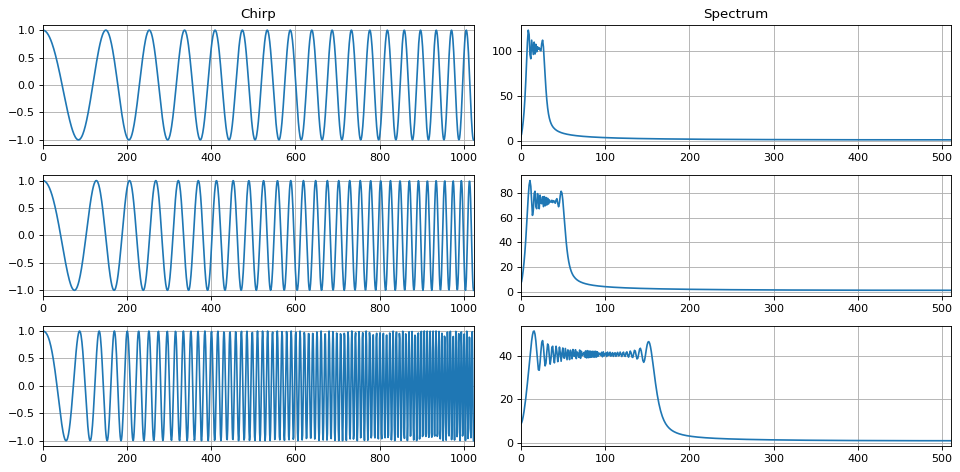

In [11]:
N = 1024
beta = [25, 49, 157]

schirp = [signal_chirp(amp=1, freq=10, beta=i, period=N) for i in beta]

# Calculate FFT
sft = np.abs(fft(schirp, axis=1))

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(kd):
    plt.subplot(len(kd), 2, 2*i+1)
    if i == 0:
        plt.title('Chirp')
    plt.plot(schirp[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

#### Complex chirp signal

Often, chirp pulses are additionally modulated with a sinusoidal envelope to achieve better spectral characteristics. You can also use a complex chirp signal.

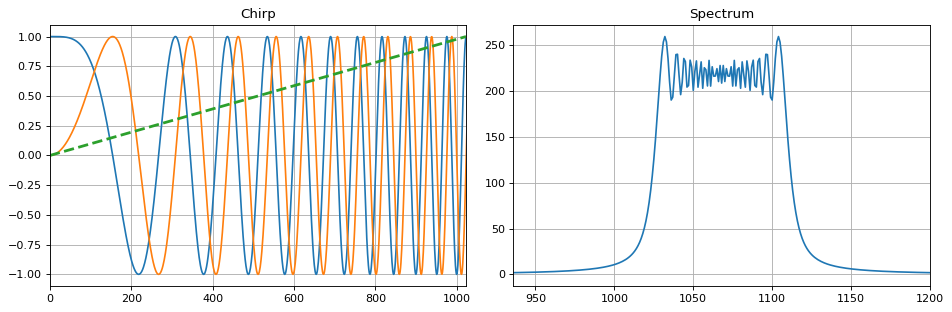

In [12]:
N = 2048
beta = 88

schirp = signal_chirp(amp=1, freq=0, beta=beta, period=N, is_complex=True)

# Calculate FFT
sft = np.abs(fftshift(fft(schirp)))

plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Chirp')
plt.plot(np.real(schirp))
plt.plot(np.imag(schirp))
plt.plot(np.linspace(0, 1, N//2), '--', linewidth='2.5')
plt.xlim([0, N//2])
plt.grid(True)
    
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.plot(sft)
plt.xlim([N//2-beta, N//2+2*beta])
plt.grid(True)
plt.tight_layout()

## Manipulation

In discrete message theory, the process of converting a bitstream into a sequence of signal chips is called digital modulation or keying. In other words, for discrete (digital) systems, the signal modulation process is called ** keying **. As with analog signals, digital harmonic sequences can be manipulated in amplitude, phase and frequency.

With low-frequency modulation (baseband modulation), these signals are in the form of pulses of a given shape. For bandpass modulation, pulses of a given shape modulate a sinusoid called the carrier frequency.

Types of manipulations:

- Amplitude (and quadrature amplitude) keying (AMn and QAM),
- Frequency shift keying (FSK),
- Phase Shift Keying (PSK).

** Amplitude-shift keying ** (Amplitude-shift keying, ASK) - signal transformation in which the amplitude of the carrier oscillation changes abruptly. The most common is quadrature amplitude modulation (QAM).

** Frequency-shift keying ** (Frequency-shift keying, FSK) - signal conversion, in which the frequency of the carrier signal changes abruptly depending on the value of the digital message.

** Phase-shift keying ** (PSK) is a signal conversion process in which the phase of the carrier wave changes abruptly. There is a large class of phase shift keyed signals: binary (BPSK, QPSK, 8-PSK, etc.)


### Amplitude Shift Keying

QAM changes the amplitude and phase of the signal. This allows you to increase the amount of transmitted information. To represent manipulated signals, the concept of a ** constellation diagram ** is introduced. It represents all possible values ​​of the complex amplitude of the manipulated signal as points on the complex plane.

Ideally, amplitude shift keying pulses are rectangular, but in practice smoother pulses are used due to the fact that an unacceptably wide signal bandwidth is required to provide strictly rectangular modulating pulses.

To ensure a high transmission rate and a high-quality level of reception reliability, the use of signals with only amplitude modulation is not enough. In this regard, in practice, signals with modulation in several parameters have become widely used. The most widespread are signals with ** amplitude-phase-shift keying **, which are also quadrature amplitude-modulated signals (QAM). They are obtained by combining the methods of amplitude and phase shift keying, which allows you to increase the number of transmitted bits in one symbol, and increase noise immunity compared to using only AMn or PSK oscillations.

Below is an example of the simplest amplitude-shift keying of a harmonic signal. The sequence of characters is specified using a random number generator of zeros and ones.

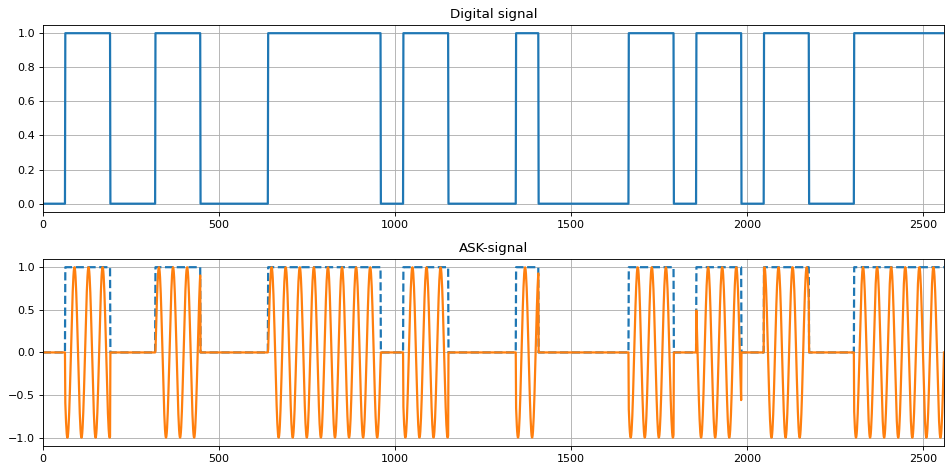

In [13]:
N = 64

# Random array of ones and zeros
np.random.seed(6)
mod_rnd = np.random.randint(0, 2, 40)
# Repeat number of ones and zeros
mod_ask = np.repeat(mod_rnd, repeats=N)

# ASK signal
M = mod_ask.size
sig_ask = mod_ask * np.sin(64 * 2.0 * np.pi * np.linspace(0, 1, M))

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_ask, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('ASK-signal')
plt.plot(mod_ask, '--', color='C0', linewidth=2.0)
plt.plot(sig_ask, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

### Frequency Shift Keying

For FSK signals, the variable parameter is the frequency, and the amplitude and initial phase remain unchanged. Logic levels '0' and '1' are assigned two frequency values. They are selected from the orthogonality condition over the signal duration interval T.

The principle of forming FSK signals is quite simple. There are several oscillators that vibrate at different frequencies. The modulating digital signal switches the signal selection multiplexer from one of the generators. Thus, a message is generated in the form of signals of different frequencies. For example, BFS uses two frequencies. Two positions are encoded with a one-bit number: "0" corresponds to the frequency from the first generator, "1" - to the frequency from the second generator.

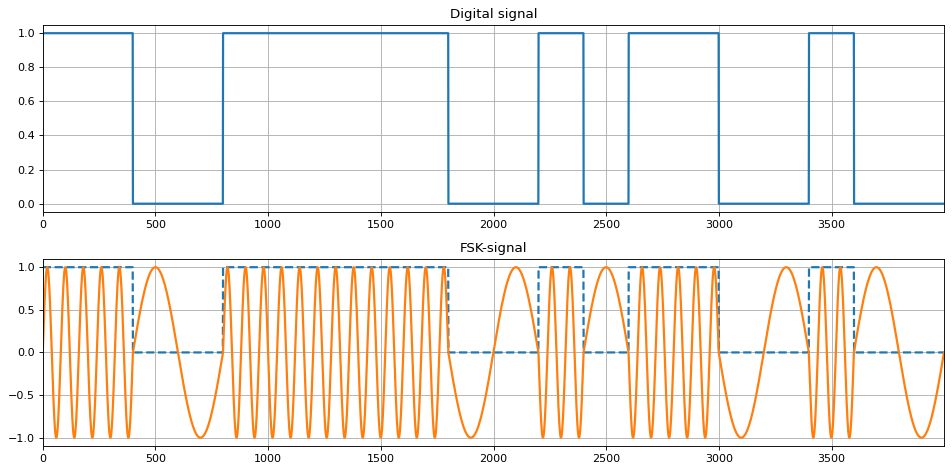

In [14]:
N = 200
# Random array of ones and zeros
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 20)
# Repeat number of ones and zeros
mod_fsk = np.repeat(mod_rnd, repeats=N)

# FSK signal
M = mod_fsk.size
mod_frq = np.zeros(M)

# Set freq 'bits' (0, 1)
mod_frq[mod_fsk == 0] = 10
mod_frq[mod_fsk == 1] = 50

sig_fsk = np.sin(mod_frq *  2.0 * np.pi * np.linspace(0, 1, M))

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_fsk, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('FSK-signal')
plt.plot(mod_fsk, '--', color='C0', linewidth=2.0)
plt.plot(sig_fsk, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

### Phase Shift Keying

For such signals, the information parameter is the phase, and to simplify the implementation of digital systems, the value of the logical '1' corresponds to the zero initial phase, and '0' is the opposite value of $ \pi $ (for two-bit phase shift keying). The transmission of logic levels is performed on one carrier frequency. In the literature, these PSK oscillations are often referred to as PM-2 signals (BPSK, Binary phase-shift keying), where 2 means the number of phase variations.

It should be noted that FM-2 signals do not allow obtaining high data transmission rates over a communication channel with a limited bandwidth, but they are the most noise-resistant to noise. The simplest FM-2 signal has not found practical application due to its too wide bandwidth and a possible random phase jump by $ \pi $, which is called the "reverse operation" mode.

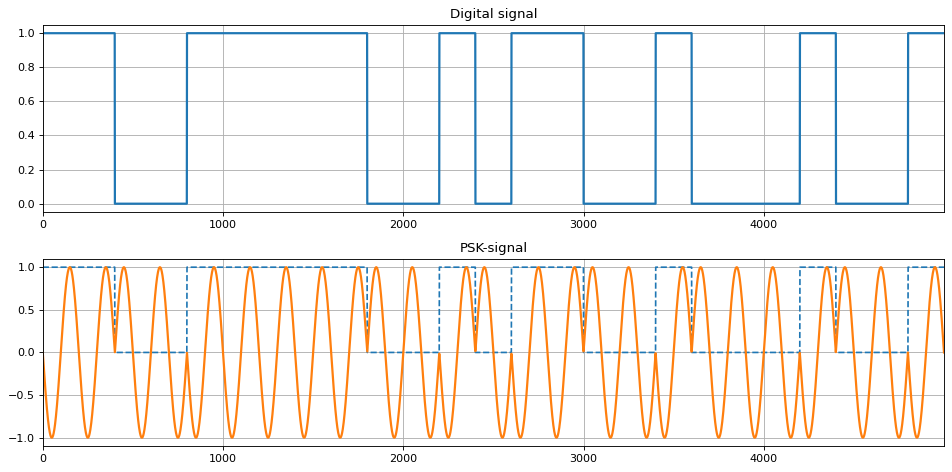

In [15]:
N = 200
# Random array of ones and zeros
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 25)
# Repeat number of ones and zeros
mod_psk = np.repeat(mod_rnd, repeats=N)

# PSK signal
M = mod_psk.size

sig_psk = np.sin(25 * 2.0 * np.pi * np.linspace(0, 1, M) + np.pi * mod_psk)

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_psk, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('PSK-signal')
plt.plot(mod_psk, '--', color='C0', linewidth=1.5)
plt.plot(sig_psk, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

The main disadvantage of signals with one-bit keying is the irrational distribution of energy in the frequency range. Due to the abrupt change in the varied parameters at the boundaries of the transitions of the symbols, most of the energy is contained outside the main lobe of the spectrum, which leads to out-of-band emission.

To avoid this, phase-continuous signals (PCS) have been introduced. There are three main methods by which signals are constructed with a relatively smooth change in signal parameters at the transition boundaries: amplitude, phase, and a combination of the two previous ones - amplitude-phase. The amplitude method makes it possible to reduce the sharp change in the signal level at the moment the oscillation phase jumps to zero. The phase method eliminates phase jumps, in which the situation of a false transition is most likely. The amplitude-phase method combines the properties of the two previous ones, and the amplitude method limits logical levels, smoothing out noise, and the phase method is designed to suppress the side lobes of the spectrum.

A detailed study of the signals presented above, as well as an examination of more complex signals and types of modulation and manipulation, is beyond the scope of this course.